## Data Processing

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("farmer_advisor_dataset.csv")

In [6]:
df.head()

Farm_ID   Soil_pH  Soil_Moisture  Temperature_C  Rainfall_mm Crop_Type  \
0        1  7.073643      49.145359      26.668157   227.890912     Wheat   
1        2  6.236931      21.496115      29.325342   244.017493   Soybean   
2        3  5.922335      19.469042      17.666414   141.110521      Corn   
3        4  6.845120      27.974234      17.188722   156.785663     Wheat   
4        5  6.934171      33.637679      23.603899    77.859362      Corn   

   Fertilizer_Usage_kg  Pesticide_Usage_kg  Crop_Yield_ton  \
0           131.692844            2.958215        1.576920   
1           136.370492           19.204770        3.824686   
2            99.725210           11.041066        1.133198   
3           194.832396            8.806271        8.870540   
4            57.271267            3.747553        8.779317   

   Sustainability_Score  
0             51.913649  
1             47.159077  
2             50.148418  
3             89.764557  
4             51.033941

In [7]:
df.shape # IN order to understand the dimensions of the dataset

(10000, 10)

In [8]:
df.info() #to know what types of data are present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Farm_ID               10000 non-null  int64  
 1   Soil_pH               10000 non-null  float64
 2   Soil_Moisture         10000 non-null  float64
 3   Temperature_C         10000 non-null  float64
 4   Rainfall_mm           10000 non-null  float64
 5   Crop_Type             10000 non-null  object 
 6   Fertilizer_Usage_kg   10000 non-null  float64
 7   Pesticide_Usage_kg    10000 non-null  float64
 8   Crop_Yield_ton        10000 non-null  float64
 9   Sustainability_Score  10000 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 781.4+ KB


In [9]:
df.isnull().sum()  # to know how many missing values are present

Farm_ID                 0
Soil_pH                 0
Soil_Moisture           0
Temperature_C           0
Rainfall_mm             0
Crop_Type               0
Fertilizer_Usage_kg     0
Pesticide_Usage_kg      0
Crop_Yield_ton          0
Sustainability_Score    0
dtype: int64

In [10]:
df.duplicated().sum() # to check for duplicate rows

np.int64(0)

In [11]:
df.describe() # to get statistical summary of numerical columns

Farm_ID       Soil_pH  Soil_Moisture  Temperature_C   Rainfall_mm  \
count  10000.00000  10000.000000   10000.000000   10000.000000  10000.000000   
mean    5000.50000      6.499494      29.988655      25.027475    174.969854   
std     2886.89568      0.574181      11.493376       5.769509     72.860989   
min        1.00000      5.500021      10.002907      15.000186     50.031967   
25%     2500.75000      6.003992      20.027802      20.078612    111.786631   
50%     5000.50000      6.495380      29.862527      24.955117    174.468002   
75%     7500.25000      6.993481      40.052369      30.053313    237.812507   
max    10000.00000      7.499762      49.994713      34.999673    299.986192   

       Fertilizer_Usage_kg  Pesticide_Usage_kg  Crop_Yield_ton  \
count         10000.000000        10000.000000    10000.000000   
mean            125.212701           10.521074        5.489634   
std              43.132645            5.535558        2.608809   
min              50.007543            1.001370        1.000323   
25%              87.945625            5.675684        3.218402   
50%             125.188012           10.619785        5.490626   
75%             162.619398           15.330758        7.740585   
max             199.991631           19.999099        9.999638   

       Sustainability_Score  
count          10000.000000  
mean              50.213200  
std               28.667146  
min                0.003672  
25%               25.974568  
50%               50.234210  
75%               74.938267  
max               99.994545

In [12]:
df.describe(include='object') # to get statistical summary of categorical columns

Crop_Type
count      10000
unique         4
top      Soybean
freq        2559

In [13]:
df = pd.get_dummies(df, drop_first=True) # to convert categorical variables into dummy/indicator variables


In [14]:
# Compute Q1 and Q3
Q1 = df['Sustainability_Score'].quantile(0.25)
Q3 = df['Sustainability_Score'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print('lower_bound:', lower_bound)
print('upper_bound:', upper_bound)

# Identify outliers
outliers = df[(df['Sustainability_Score'] < lower_bound) | (df['Sustainability_Score'] > upper_bound)]
print("Number of outliers in 'Sustainability_Score':", outliers.shape[0])

lower_bound: -47.470981043895364
upper_bound: 148.38381590794924
Number of outliers in 'Sustainability_Score': 0


In [19]:
cols_to_convert = [
    'Farm_ID',
    'Soil_pH',
    'Soil_Moisture',
    'Temperature_C',
    'Rainfall_mm',
    'Fertilizer_Usage_kg',
    'Pesticide_Usage_kg',
    'Crop_Yield_ton',
    'Sustainability_Score'
]

existing_cols = [col for col in cols_to_convert if col in df.columns]

if existing_cols:
    print(df[existing_cols].describe())
else:
    print("None of the specified columns exist in the dataframe.")

           Farm_ID       Soil_pH  Soil_Moisture  Temperature_C   Rainfall_mm  \
count  10000.00000  10000.000000   10000.000000   10000.000000  10000.000000   
mean    5000.50000      6.499494      29.988655      25.027475    174.969854   
std     2886.89568      0.574181      11.493376       5.769509     72.860989   
min        1.00000      5.500021      10.002907      15.000186     50.031967   
25%     2500.75000      6.003992      20.027802      20.078612    111.786631   
50%     5000.50000      6.495380      29.862527      24.955117    174.468002   
75%     7500.25000      6.993481      40.052369      30.053313    237.812507   
max    10000.00000      7.499762      49.994713      34.999673    299.986192   

       Fertilizer_Usage_kg  Pesticide_Usage_kg  Crop_Yield_ton  \
count         10000.000000        10000.000000    10000.000000   
mean            125.212701           10.521074        5.489634   
std              43.132645            5.535558        2.608809   
min            

In [20]:
# Define feature columns (excluding the target)
feature_cols = [col for col in df.columns if col != 'Sustainability_Score']

# Declare X (features) and y (target)
X = df[feature_cols]
y = df['Sustainability_Score']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (10000, 11)
Target shape: (10000,)


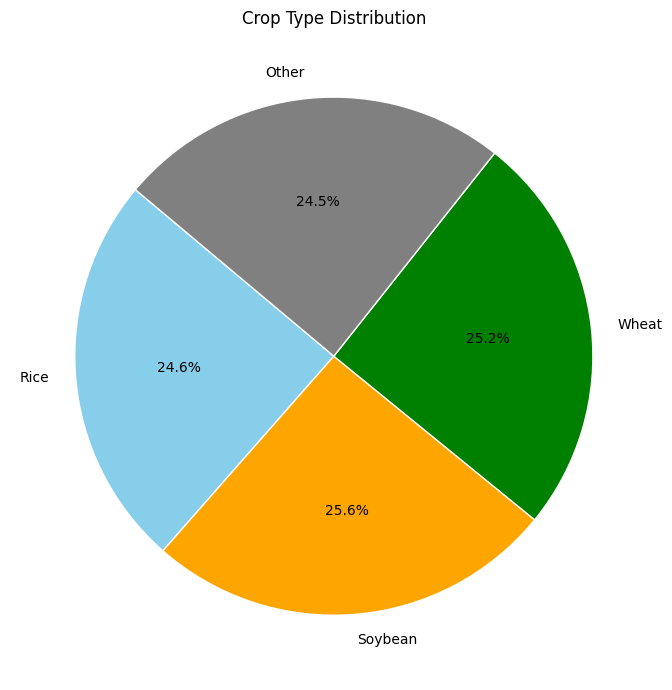

In [22]:
# Pie chart for crop type breakdown
labels = ['Rice', 'Soybean', 'Wheat', 'Other']
sizes = [rice_total, soybean_total, wheat_total, other_total]
colors = ['skyblue', 'orange', 'green', 'gray']

fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'white'})
ax.set_title('Crop Type Distribution')
plt.tight_layout()
plt.show()


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

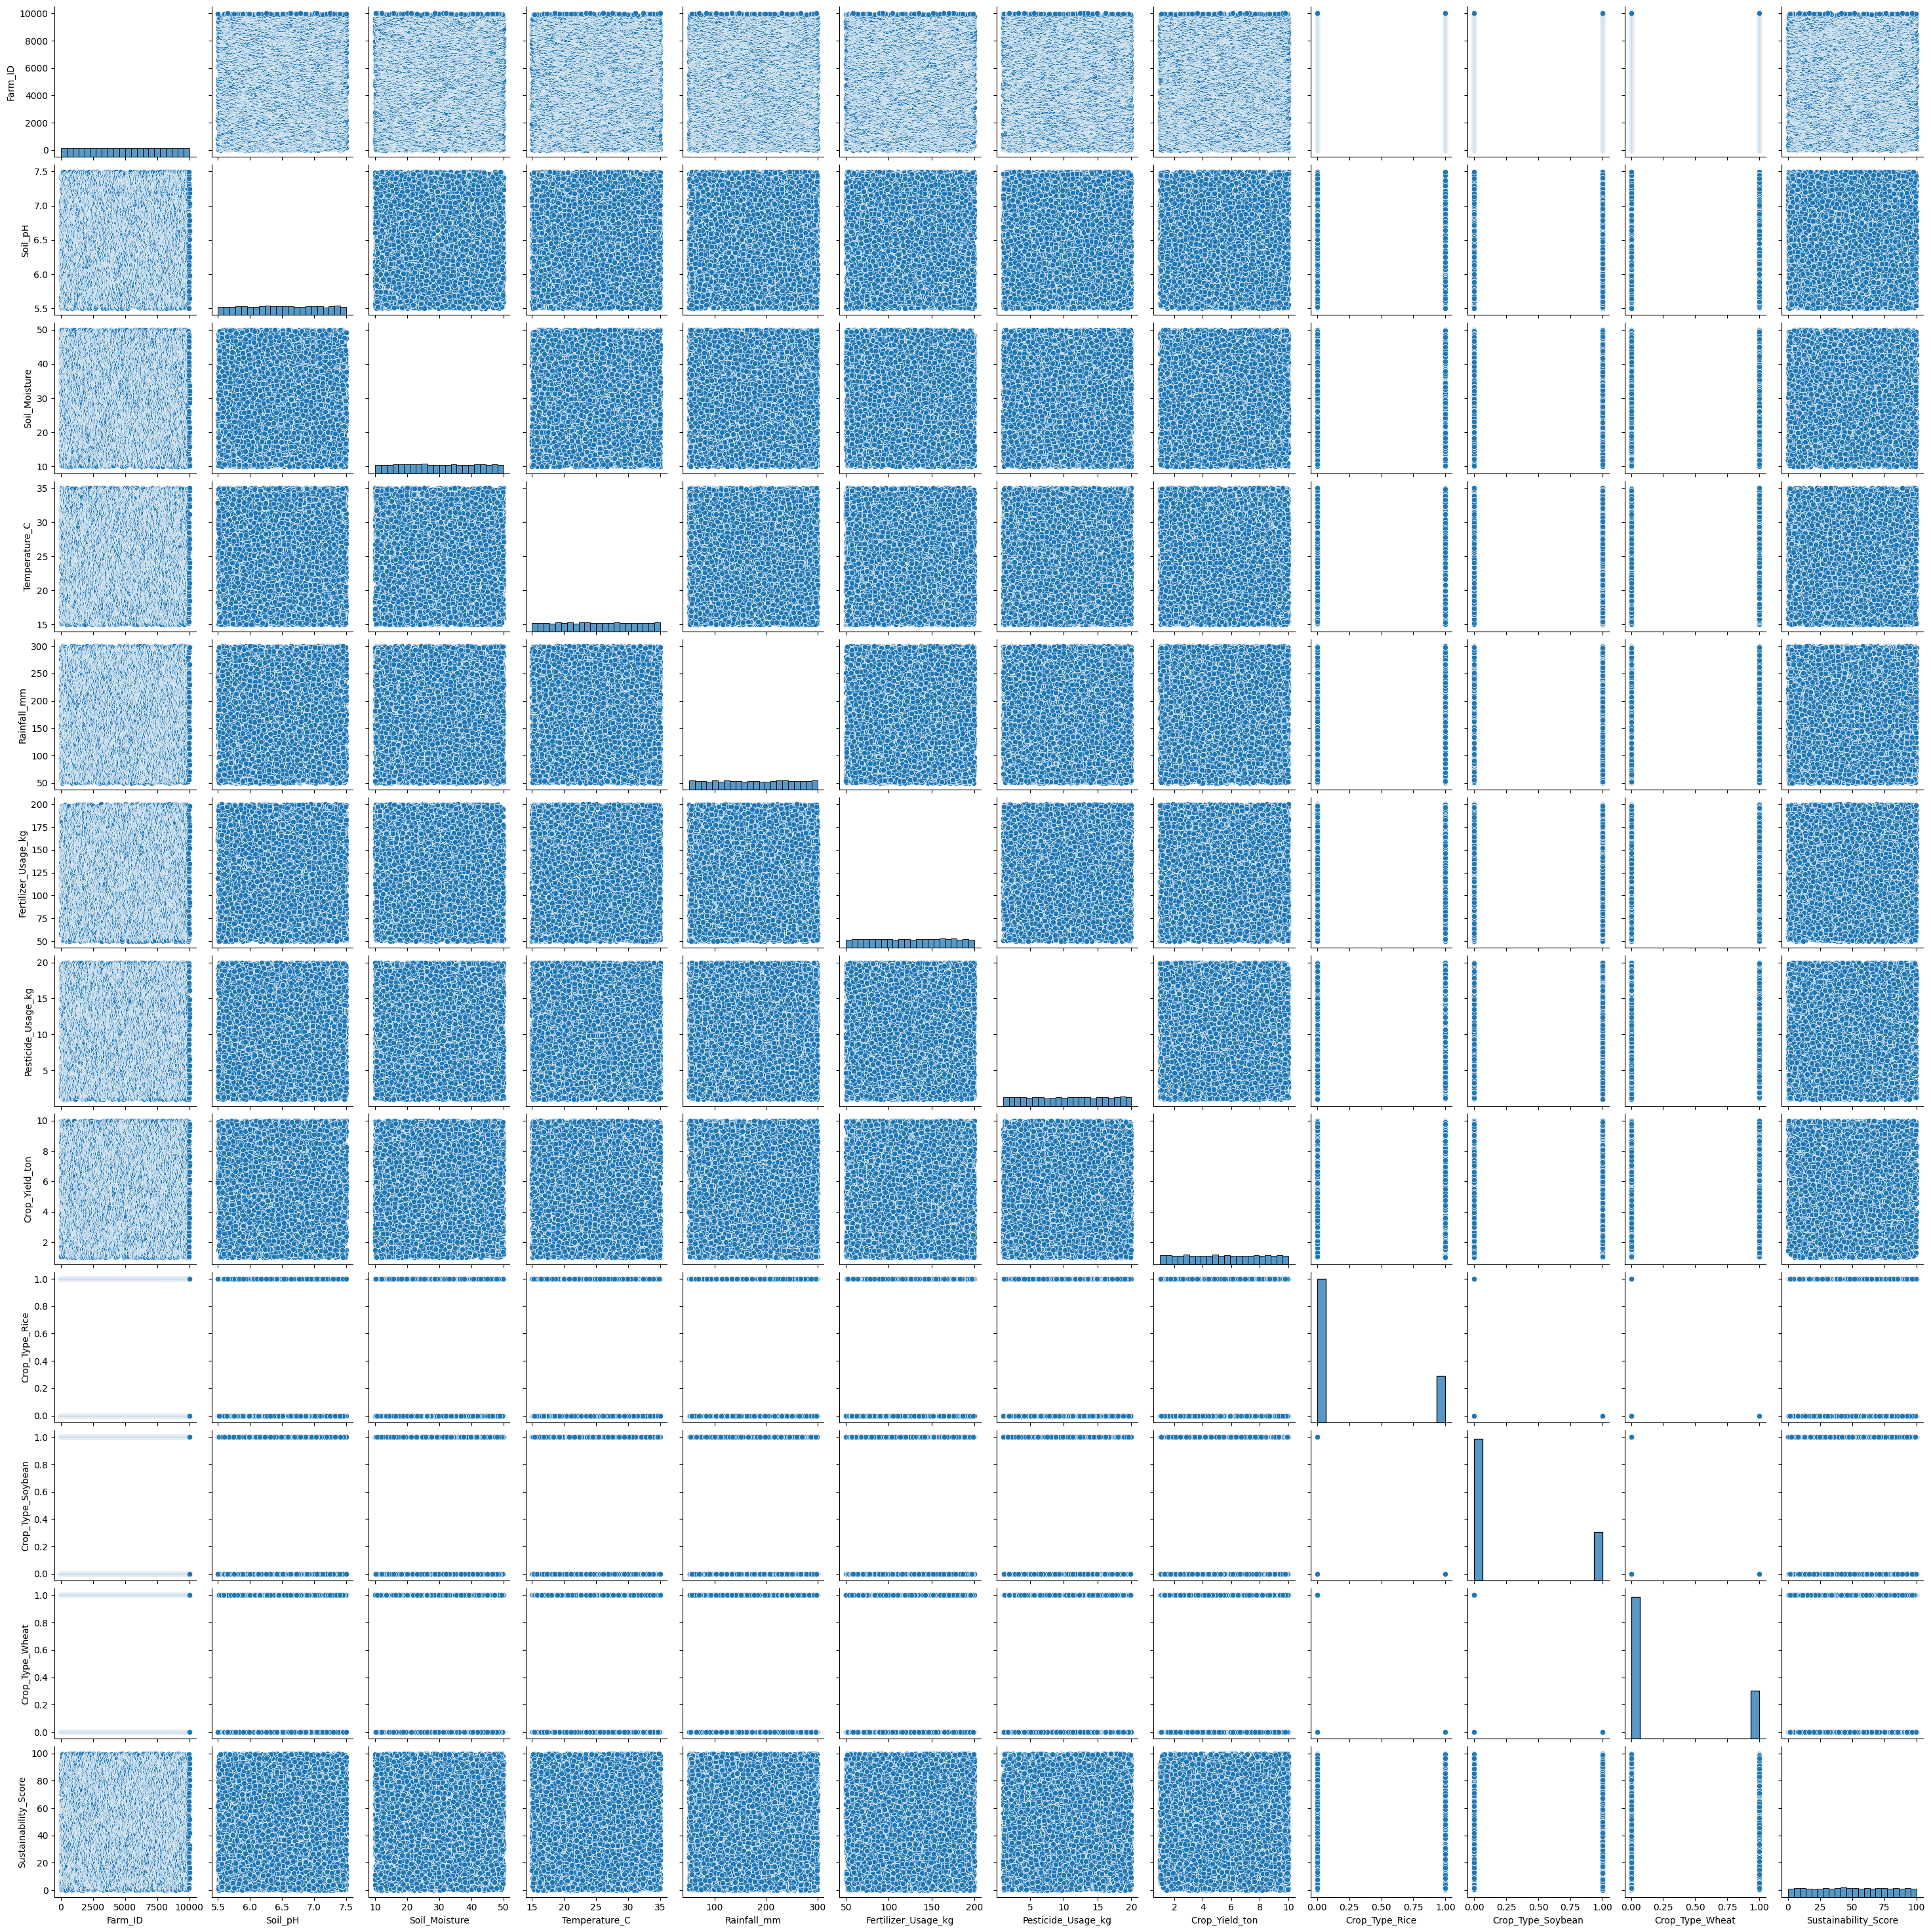

In [26]:

# 1. Visualize feature relationships
sns.pairplot(df[feature_cols + ['Sustainability_Score']])
plt.show()

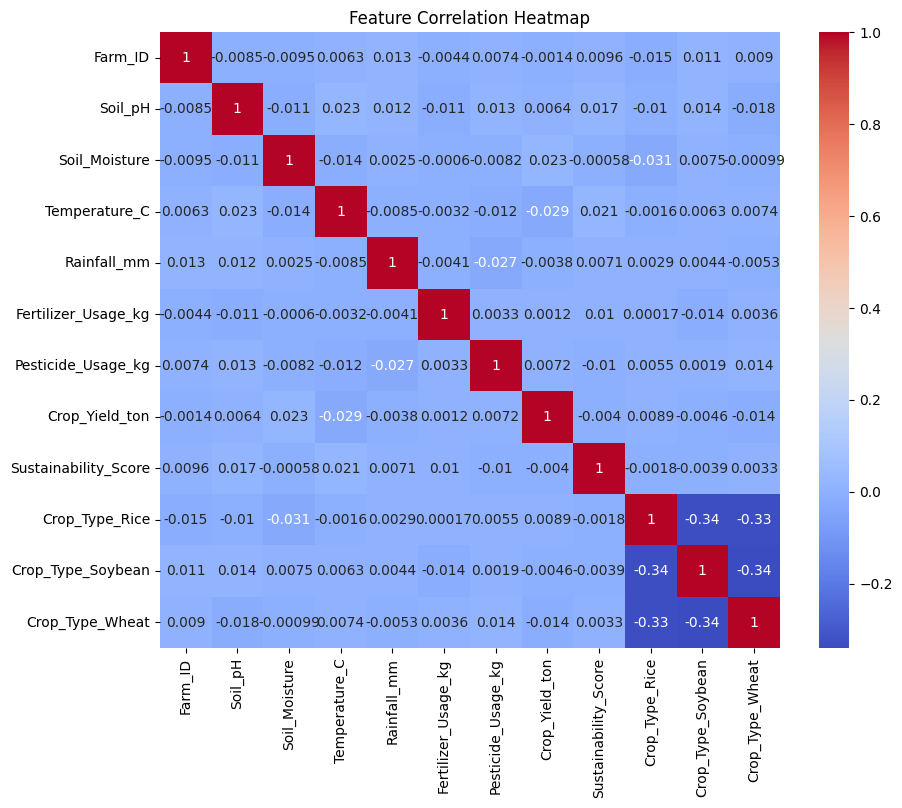

In [27]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


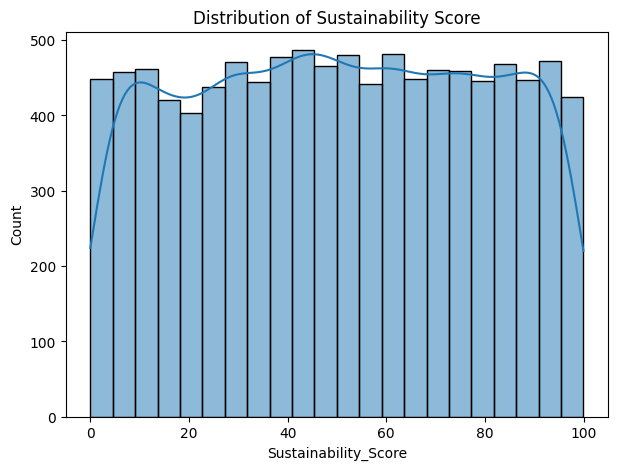

In [28]:
# Distribution of target variable
plt.figure(figsize=(7, 5))
sns.histplot(df['Sustainability_Score'], kde=True)
plt.title('Distribution of Sustainability Score')
plt.show()

In [29]:
# 2. Preprocessing

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [30]:
# 3. Modeling

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [31]:
# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

R² Score: -0.0010434882422469816
MAE: 24.99258460079872
RMSE: 28.850921360698877


c:\Users\My Pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


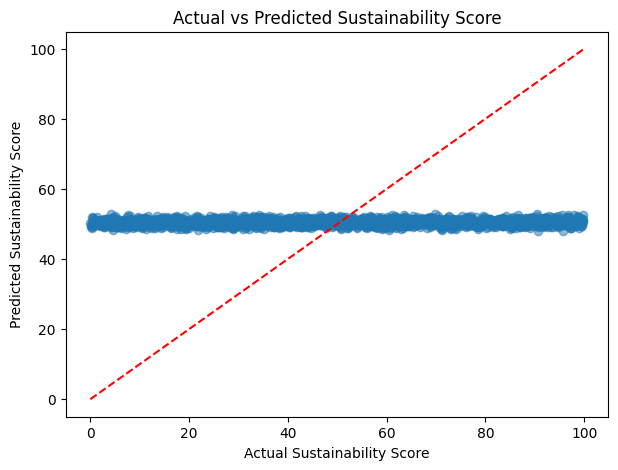

In [32]:
# Prediction graph
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Sustainability Score')
plt.ylabel('Predicted Sustainability Score')
plt.title('Actual vs Predicted Sustainability Score')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()